In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms import community
import numpy as np

In [ ]:
class LouvainVisualizer:
    def __init__(self, G=None):
        """
        Initialize visualizer with an optional graph
        """
        self.G = G if G is not None else nx.karate_club_graph()

    def detect_communities(self):
        """
        Detect communities using Louvain algorithm
        """
        self.communities = list(community.louvain_communities(self.G))
        return self.communities

    def analyze_communities(self):
        """
        Analyze the detected communities
        """
        self.analysis = {
            'num_communities': len(self.communities),
            'community_sizes': [len(c) for c in self.communities],
            'modularity': community.modularity(self.G, self.communities),
            'node_distribution': {}
        }

        # Analyze node distribution
        for i, comm in enumerate(self.communities):
            self.analysis['node_distribution'][f'Community {i+1}'] = list(comm)

        return self.analysis

    def visualize(self, figsize=(15, 10)):
        """
        Create visualization of the communities
        """
        plt.figure(figsize=figsize)

        # Create a colormap
        colors = list(mcolors.TABLEAU_COLORS.values())
        if len(self.communities) > len(colors):
            colors = plt.cm.tab20(np.linspace(0, 1, len(self.communities)))

        # Create position layout
        pos = nx.spring_layout(self.G, k=1/np.sqrt(len(self.G.nodes())), iterations=50)

        # Draw the graph
        plt.subplot(121)
        for idx, community in enumerate(self.communities):
            nx.draw_networkx_nodes(self.G, pos,
                                 nodelist=list(community),
                                 node_color=[colors[idx]],
                                 node_size=500,
                                 alpha=0.7,
                                 label=f'Community {idx+1}')

        nx.draw_networkx_edges(self.G, pos, alpha=0.5)
        nx.draw_networkx_labels(self.G, pos)
        plt.title("Network Communities (Louvain Method)")
        plt.legend()

        # Add community size distribution
        plt.subplot(122)
        community_sizes = [len(c) for c in self.communities]
        plt.bar(range(1, len(community_sizes) + 1), community_sizes,
                color=colors[:len(community_sizes)])
        plt.title("Community Size Distribution")
        plt.xlabel("Community")
        plt.ylabel("Number of Nodes")

        plt.tight_layout()
        plt.show()

    def print_analysis(self):
        """
        Print detailed analysis of the communities
        """
        print("\nChi tiết phân tích cộng đồng bằng thuật toán Louvain:")
        print("-" * 50)
        print(f"Số lượng cộng đồng phát hiện được: {self.analysis['num_communities']}")
        print(f"Modularity của phân vùng: {self.analysis['modularity']:.4f}")
        print("\nPhân bố kích thước cộng đồng:")
        for i, size in enumerate(self.analysis['community_sizes']):
            print(f"Cộng đồng {i+1}: {size} nodes")
        print("\nChi tiết các node trong mỗi cộng đồng:")
        for comm_name, nodes in self.analysis['node_distribution'].items():
            print(f"{comm_name}: {sorted(nodes)}")

Tạo đồ thị mẫu...
Khởi tạo bộ phân tích và trực quan hóa...
Đang phát hiện cộng đồng...
Đang phân tích cộng đồng...

Chi tiết phân tích cộng đồng bằng thuật toán Louvain:
--------------------------------------------------
Số lượng cộng đồng phát hiện được: 4
Modularity của phân vùng: 0.4277

Phân bố kích thước cộng đồng:
Cộng đồng 1: 6 nodes
Cộng đồng 2: 10 nodes
Cộng đồng 3: 12 nodes
Cộng đồng 4: 6 nodes

Chi tiết các node trong mỗi cộng đồng:
Community 1: [1, 2, 3, 7, 12, 13]
Community 2: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
Community 3: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 4: [23, 24, 25, 27, 28, 31]

Đang tạo biểu đồ trực quan...


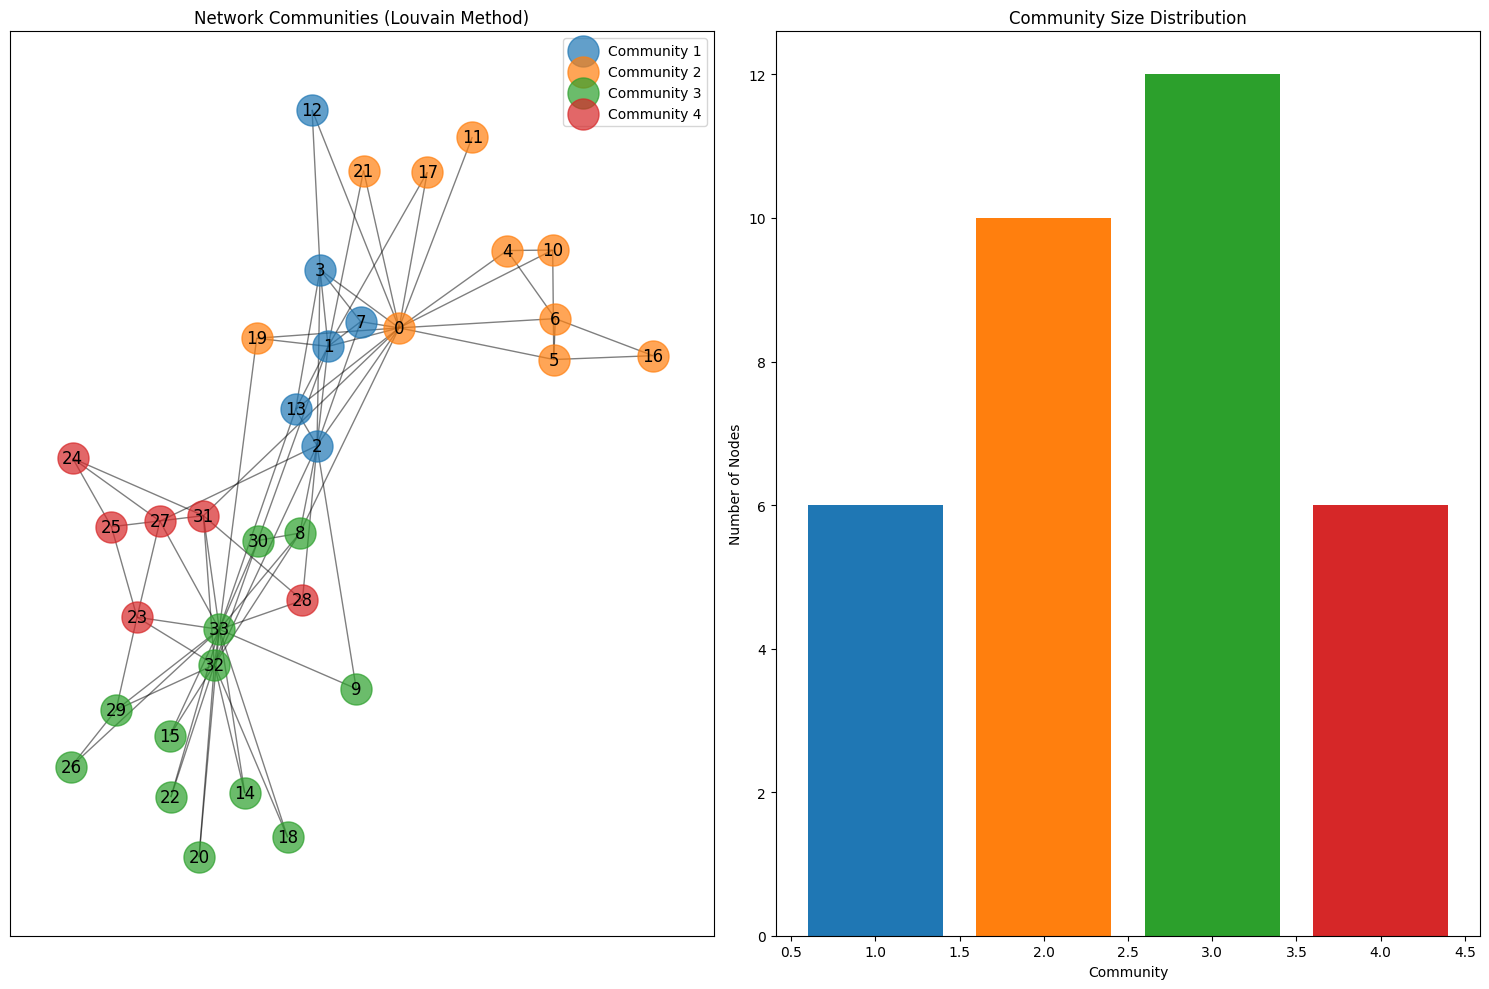

In [ ]:
def main():
    # Create a sample graph
    print("Tạo đồ thị mẫu...")
    G = nx.karate_club_graph()

    # Initialize visualizer
    print("Khởi tạo bộ phân tích và trực quan hóa...")
    visualizer = LouvainVisualizer(G)

    # Detect communities
    print("Đang phát hiện cộng đồng...")
    communities = visualizer.detect_communities()

    # Analyze communities
    print("Đang phân tích cộng đồng...")
    analysis = visualizer.analyze_communities()

    # Print analysis
    visualizer.print_analysis()

    # Visualize results
    print("\nĐang tạo biểu đồ trực quan...")
    visualizer.visualize()

if __name__ == "__main__":
    main()


Biểu đồ kích thước cho thấy có một cộng đồng lớn (12 nút), hai cộng đồng trung bình (10 và 8 nút), và một cộng đồng nhỏ hơn (6 nút). Sự phân bổ này phản ánh sự khác biệt trong vai trò hoặc mức độ kết nối của các nút trong mạng.

Các cộng đồng tách biệt hợp lý nhưng có thể một số nút ở biên có liên kết yếu với cộng đồng của chúng.